In [1]:
import json
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load history
with open("./weights/wandb_train_eval_metrics.pkl", "rb") as f:
    ds = pickle.load(f)

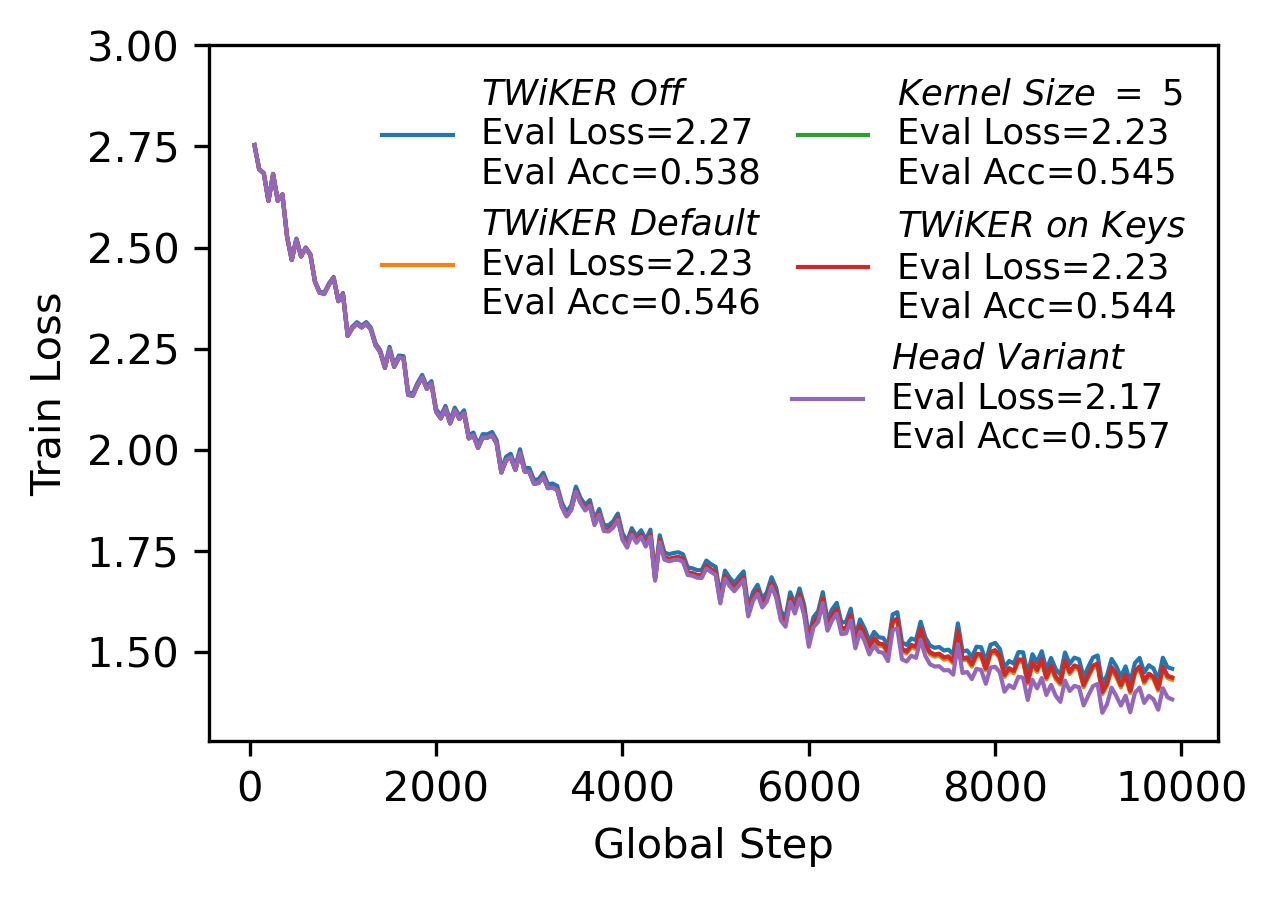

In [3]:
cases = {
    "TWiKER Off": 'gpt2.potter_01_off.train_twiker',
    "TWiKER Default": 'gpt2.potter_02_ref.train_twiker',
    "Kernel Size = 5": 'gpt2.potter_03_k5.train_twiker',
    "TWiKER on Keys": 'gpt2.potter_04_key.train_twiker',
    "Head Variant": 'gpt2.potter_05_head.train_twiker',
}

fig, ax = plt.subplots(dpi=300, figsize=(4.7 / 1.1, 4 / 1.1))
for name, key in cases.items():
    steps = np.array(ds[key]["train/global_step"])[:, 0]
    losses = np.array(ds[key]["train/loss"])
    italic_name = name.replace(" ", r"\ ")
    ax.plot(steps, losses, lw=1,
            label=rf"$\mathit{{{italic_name}}}$"
                  f"\nEval Loss={ds[key]['eval/loss'][-1]:.2f}\n"
                  f"Eval Acc={ds[key]['eval/accuracy'][-1]:.3f}")
    ax.set_xlabel("Global Step")
    ax.set_ylabel("Train Loss")

plt.ylim(top=3)

# 获取 legend 句柄
handles, labels = ax.get_legend_handles_labels()

# 前4个正常放
legend1 = ax.legend(handles[:4], labels[:4], fontsize=8.5, ncol=2, columnspacing=1,
                    loc='upper right', frameon=False)

# 最后1个单独放
legend2 = ax.legend(handles[4:], labels[4:], fontsize=8.5, ncol=1,
                    bbox_to_anchor=(0.985, 0.62), frameon=False)

ax.add_artist(legend1)  # 保留第一个 legend

fig.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig("results/figs/loss.pdf", bbox_inches="tight", pad_inches=.02)


In [4]:
# case dictionary
books = {
    "potter": "Reference",
    "potter_k5": "Kernel size = 5",
    "potter_key": "TWiKER on Keys",
    "potter_head": "Head Variant",
}

# Load JSON data
pos_dist_dict_book = {}
for book in books:
    with open(f"results/distance/{book}.json", "r") as file:
        pos_dist_dict_book[book] = json.load(file)

In [5]:
classes = {
    "intj": "Interjection (Wow, Ha)",
    "propn": "Proper Noun (Harry, UK)",
    "noun": "Noun (apple, car)",
    "verb": "Verb (run, eat)",
    "adj": "Adjective (happy, tall)",
    "adv": "Adverb (quickly, softly)",
    "sconj": "Subord. Conj. (if, as)",
    "aux": "Auxiliary Verb (is, has)",
    "prop": "Preposition (in, of)",
    "pron": "Pronoun (she, they)",
    "cconj": "Coord. Conj. (and, or)",
    "det": "Determiner (the, an)"
}

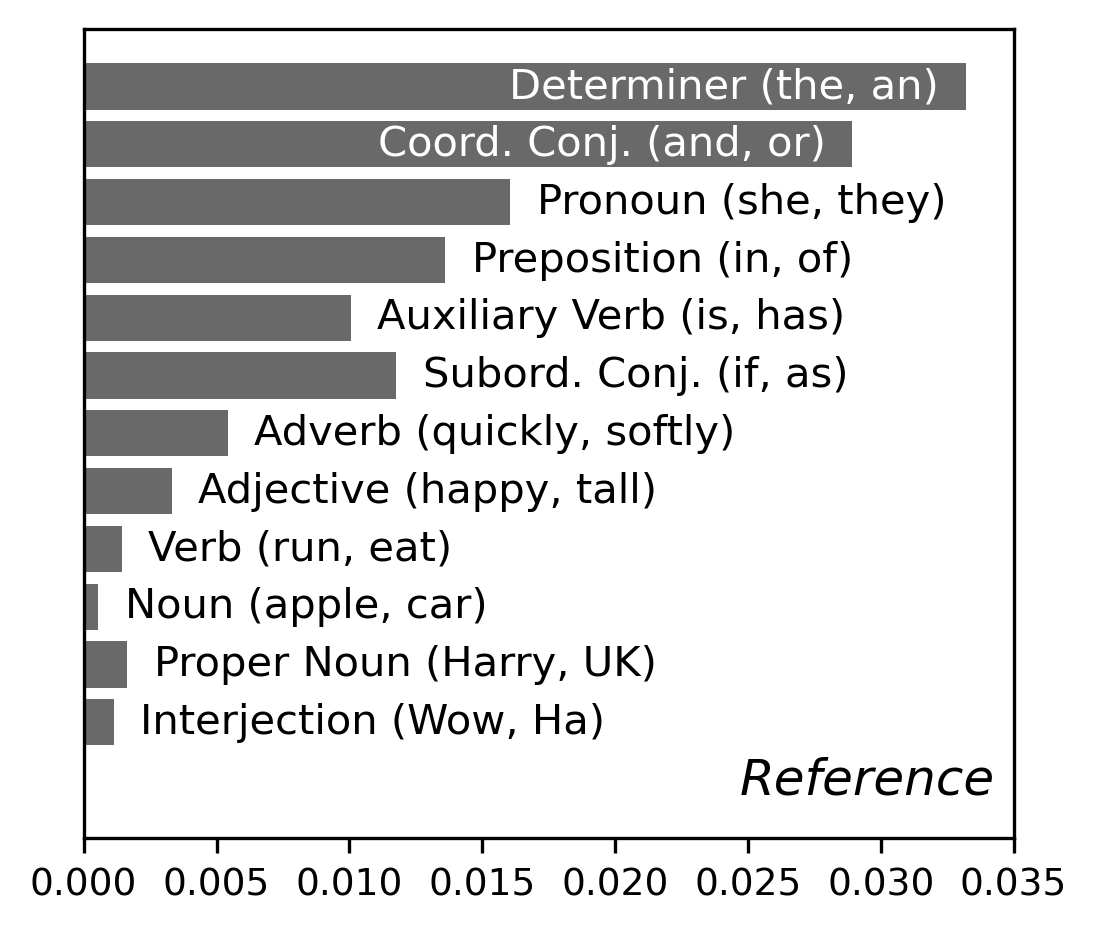

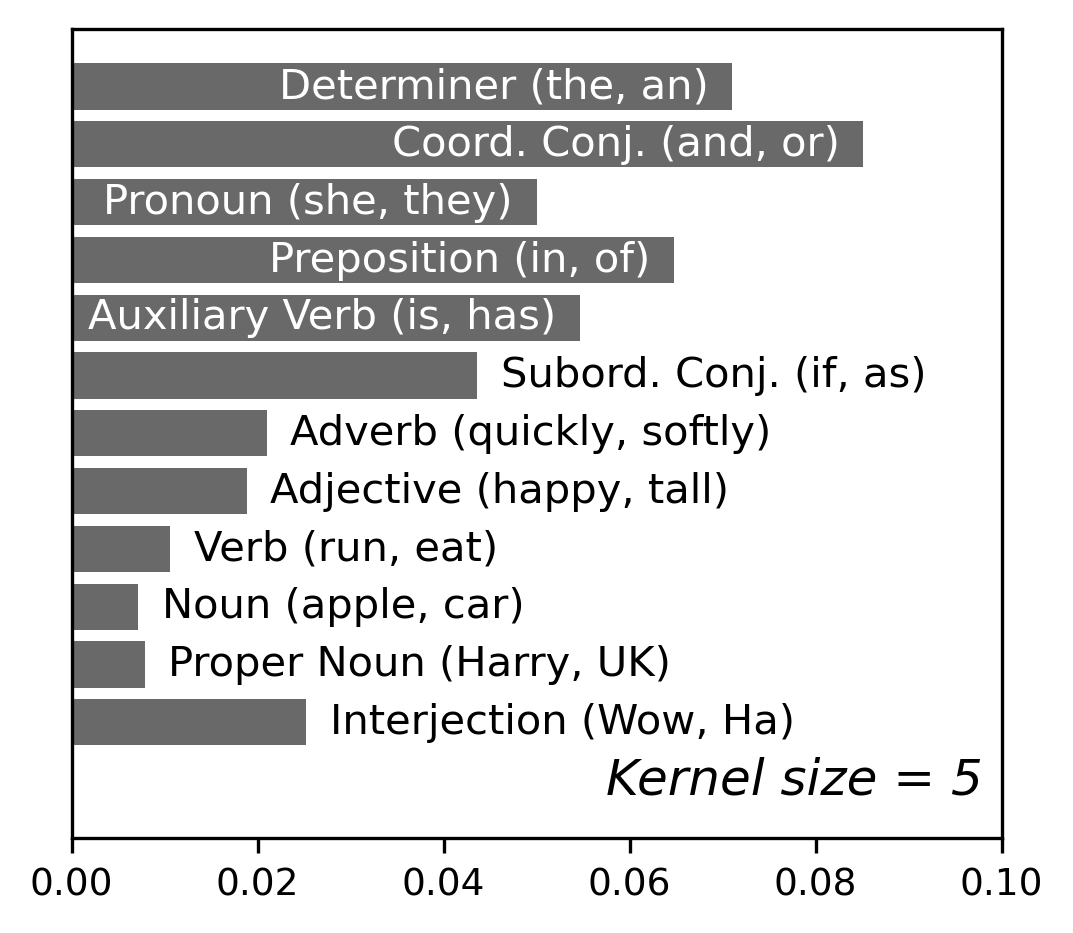

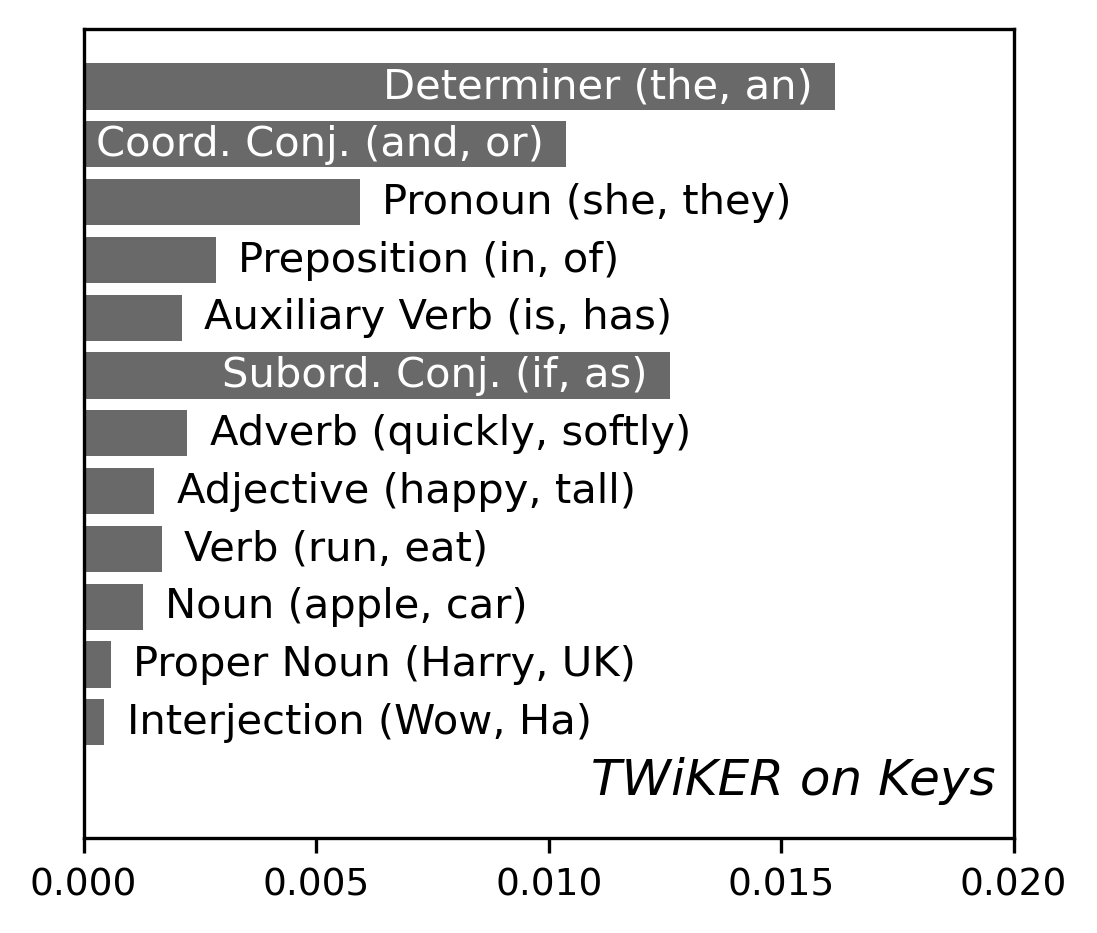

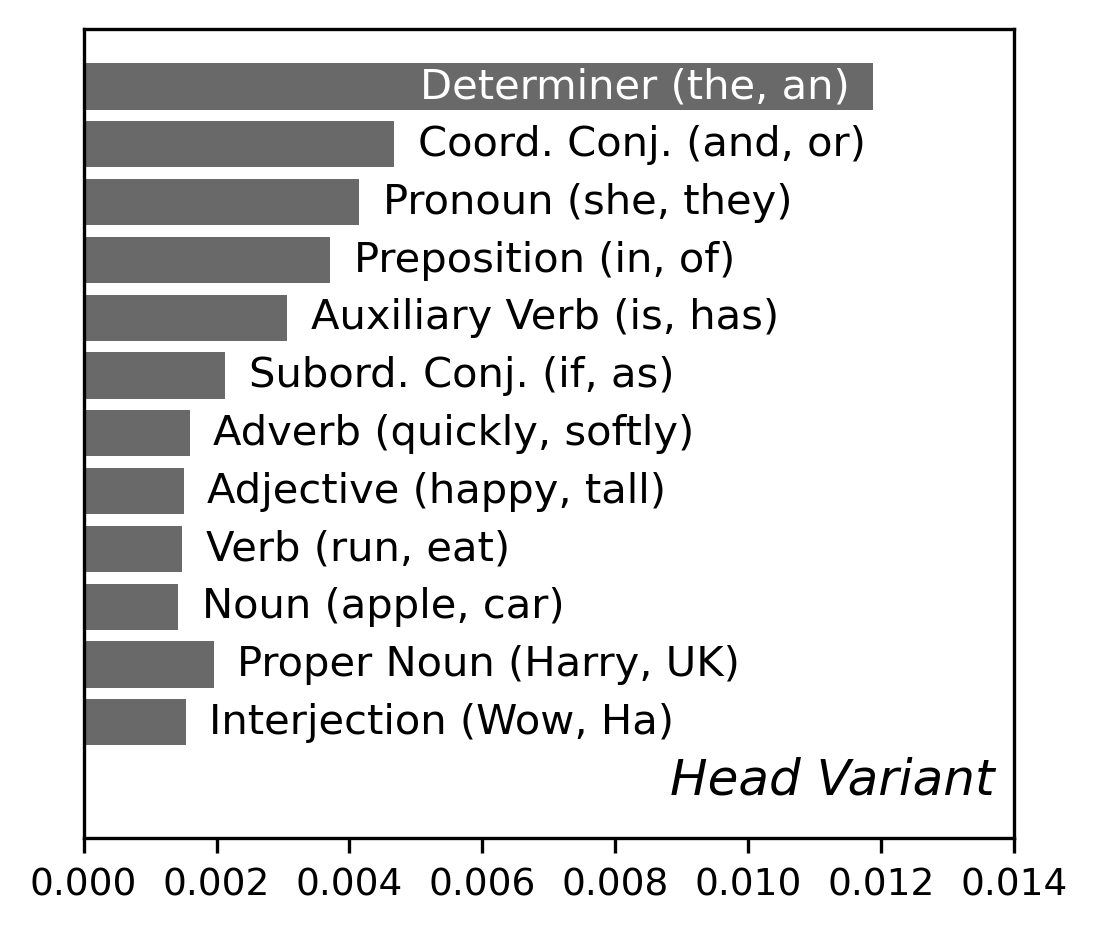

In [6]:
left_dict = {
    "potter_k5": ["Determiner (the, an)",
                  "Coord. Conj. (and, or)",
                  "Preposition (in, of)",
                  "Auxiliary Verb (is, has)",
                  "Pronoun (she, they)"],
    "potter_key": ["Determiner (the, an)", "Coord. Conj. (and, or)", "Subord. Conj. (if, as)"],
    "potter_head": ["Determiner (the, an)"],
}

xlims = {
    "potter_key": 0.018
}

for book in books:
    left = left_dict[book] if book in left_dict else ["Determiner (the, an)", "Coord. Conj. (and, or)"]

    plt.figure(dpi=300, figsize=(4, 3.5))
    values = [pos_dist_dict_book[book][k] for k in classes.keys()]
    labels = list(classes.values())
    values = np.array(values)
    if book == "potter_head":
        values *= 12

    plt.barh(labels, values, color="dimgray", height=0.8)
    plt.gca().set_yticks([])

    plt.xlim(0, xlims.get(book, None))
    plt.ylim(bottom=-2)
    xticks = plt.xticks()[0]
    plt.xticks(xticks, fontsize=9)

    for i, (label, value) in enumerate(zip(labels, values)):
        delta = max(values) * 0.03
        if label in left:
            plt.text(value - delta, i, f"{label}", va="center", ha="right", fontsize=10, color="white")
        else:
            plt.text(value + delta, i, f"{label}", va="center", ha="left", fontsize=10)

    plt.text(plt.gca().get_xlim()[1] * 0.98, -1, books[book],
         fontsize=12, ha="right", va="center", fontstyle="italic")
    if book == "potter":
        book = "potter_k3"
    plt.savefig(f"results/figs/books/{book}.pdf", bbox_inches="tight", pad_inches=0.02)
    plt.show()